In [1]:
%matplotlib inline
import cv2 
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./img/arc.jpg', 1) #利用灰階讀圖

In [2]:
color =cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #read by RGB
HSVframe =cv2.cvtColor(img, cv2.COLOR_BGR2HSV) #HSV

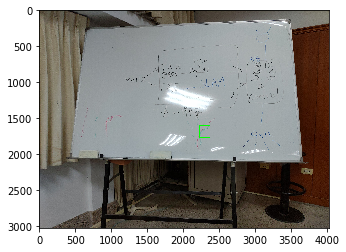

In [40]:
colorLow = np.array([35,43,46]) #green(HSV)
colorHigh = np.array([90,255,255]) #green(HSV)
mask = cv2.inRange(HSVframe, colorLow, colorHigh)
contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
for i in contours:#將每個框框大於50*50的標起來
    cnt=i
    x,y,w,h = cv2.boundingRect(cnt)
    if w>50 and h>50:
        cv2.rectangle(color,(x,y),(x+w,y+h),(0,255,0),10)
'''
c = max(contours, key = cv2.contourArea)
x,y,w,h = cv2.boundingRect(c)
cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),20)
'''
plt.imshow(color)

array([[[ 59,  55,  30],
        [ 58,  54,  29],
        [ 58,  52,  28],
        ...,
        [115, 112,  95],
        [119, 116,  99],
        [114, 111,  94]],

       [[ 64,  60,  35],
        [ 57,  53,  28],
        [ 59,  53,  29],
        ...,
        [120, 117, 100],
        [118, 115,  98],
        [114, 111,  94]],

       [[ 56,  54,  29],
        [ 51,  49,  24],
        [ 55,  51,  26],
        ...,
        [117, 114,  97],
        [117, 114,  97],
        [117, 114,  97]],

       ...,

       [[138, 136, 137],
        [139, 137, 138],
        [139, 137, 138],
        ...,
        [ 74,  74,  64],
        [ 71,  72,  58],
        [ 69,  70,  54]],

       [[132, 130, 131],
        [135, 133, 134],
        [133, 131, 132],
        ...,
        [ 79,  77,  65],
        [ 91,  89,  74],
        [105, 104,  86]],

       [[138, 136, 137],
        [133, 131, 132],
        [123, 121, 122],
        ...,
        [ 89,  85,  73],
        [ 99,  97,  82],
        [114, 113,  95]]

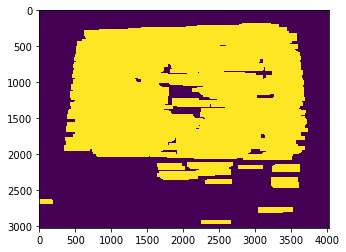

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    # makes the blues image look real colored
blurred = cv2.GaussianBlur(gray, (5, 5), 0) 
canny = cv2.Canny(blurred, 0, 20)

kernel = np.ones((1, 20), np.uint8) #設定卷積核 (高, 寬)
dilation = cv2.dilate(canny,kernel,iterations = 1)
dst = 255 - dilation #反白

kernel = np.ones((50,50), np.uint8) 
morph_o = cv2.morphologyEx(dst, cv2.MORPH_OPEN, kernel) #影象開運算-去除躁點

kernel = np.ones((1, 300), np.uint8) #設定卷積核 (高, 寬)
dilation = cv2.dilate(morph_o,kernel,iterations=1)
plt.imshow(dilation)

contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

c = max(contours, key = cv2.contourArea)
x,y,w,h = cv2.boundingRect(c)
cv2.rectangle(color,(x,y),(x+w,y+h),(255,0,0),20)
#plt.imshow(color)